<center><h1>Important Libraries

In [1]:
# for manupilating data
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns


# settings
%matplotlib inline

# ml tools
from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   power_transform,
                                   FunctionTransformer)
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import (StratifiedKFold,
                                     cross_val_predict,
                                     cross_val_score,
                                     train_test_split,
                                     GridSearchCV)

# imblearn tools
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (AdaBoostClassifier,
                              RandomForestClassifier,
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import (BalancedBaggingClassifier,
                               BalancedRandomForestClassifier,
                               EasyEnsembleClassifier)
from xgboost import XGBClassifier

# metrics
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             roc_auc_score,
                             roc_curve)

# style
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

plt.style.use("seaborn")

# warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<center><h1>Take a look at the data

In [2]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

Okay, Let's begin by taking a look at **columns**, **their types** and **non-null count**.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> **I will start by talking about each column and it's content.**
> - **`customerID`**: Simply, the id for each customer.
> - **`gender`**: Whether the customer is a male or a female.
> - **`SeniorCitizen`**: Whether the customer is a senior citizen or not (1, 0).
> - **`Partner`**: Whether the customer has a partner or not (Yes, No).
> - **`Dependnts`** : Whether the customer has dependents or not (Yes, No).
> - **`tenure`** : Number of months the customer has stayed with the company.
> - **`PhoneService`** : Whether the customer has a phone service or not (Yes, No).
> - **`MultipleLines`** : Whether the customer has multiple lines or not (Yes, No, No phone service).
> - **`InternetService`** : Customer’s internet service provider (DSL, Fiber optic, No).
> - **`OnlineSecurity`** : Whether the customer has online security or not (Yes, No, No internet service).
> - **`OnlineBackup`** : Whether the customer has online backup or not (Yes, No, No internet service).
> - **`DeviceProtection`** : Whether the customer has device protection or not (Yes, No, No internet service).
> - **`TechSupport`** : Whether the customer has tech support or not (Yes, No, No internet service).
> - **`StreamingTV`** : Whether the customer has streaming TV or not (Yes, No, No internet service).
> - **`StreamingMovies`** : Whether the customer has streaming movies or not (Yes, No, No internet service).
> - **`Contract`** : The contract term of the customer (Month-to-month, One year, Two year).
> - **`PaperlessBilling`** : Whether the customer has paperless billing or not (Yes, No).
> - **`PaymentMethod`** : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)).
> - **`MonthlyCharges`** : The amount charged to the customer monthly.
> - **`TotalCharges`** : The total amount charged to the customer.
> - **`churn`** : Whether the customer churned or not (Yes or No).

> **Some nice notes:**
> - **`No Null`** values in the data.
> - **`SeniorCitizen`** is of type **`int64`** and it should be a **`category`** column.
> - **`TotalCharges`** is of type **`object`** and it's a **`numeric`** column.
> - Many columns need to be converted to **`category`** type.
> - **`customerID`** won't be useful. I will drop it.

In [5]:
# let's see what is making TotalCharges object column
for i in range(len(df["TotalCharges"])):
    val = df["TotalCharges"][i]
    try:
        float(val)
    except:
        print(f"Row {i} has a value of TotalCharges = {val}")

Row 488 has a value of TotalCharges =  
Row 753 has a value of TotalCharges =  
Row 936 has a value of TotalCharges =  
Row 1082 has a value of TotalCharges =  
Row 1340 has a value of TotalCharges =  
Row 3331 has a value of TotalCharges =  
Row 3826 has a value of TotalCharges =  
Row 4380 has a value of TotalCharges =  
Row 5218 has a value of TotalCharges =  
Row 6670 has a value of TotalCharges =  
Row 6754 has a value of TotalCharges =  


Don't be surprised, **`""`** was our enemy from the beginning. It's only an **empty string**.<br>
We can safely convert it to **null value**. We have **11** of those little demons.

In [6]:
# applying pd.to_numeric() while making errors = "coerce" will automatically convert strings to nulll values.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [7]:
# Let's check
assert df["TotalCharges"].dtype == "float64"

# Let's make sure we converted empty strings to null values correctly.
df["TotalCharges"].isnull().sum()

11

11 is a small number, so I will do the easies solution and I will drop them.

In [8]:
df.dropna(axis = 0, inplace = True)
assert df["TotalCharges"].isnull().sum() == 0

Let's see if we have **`duplicated rows`**.

In [9]:
df.duplicated().sum()

0

Okay, there is no duplicates and this is relieving.

In [10]:
# Time for SeniorCitizen to be converted to category
df["SeniorCitizen"] = df["SeniorCitizen"].astype("category")

#check
assert df["SeniorCitizen"].dtype == "category"

In [11]:
# convert columns to categoris
cols_to_cat = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
               "PaperlessBilling", "PaymentMethod", "Churn"]

for col in cols_to_cat:
    df[col] = df[col].astype("category")

In [12]:
# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

Now, Let's dig a little bit more and see each column **describtion**.<br>
First, **Categorical** columns.

In [13]:
df.describe(include = "category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


I think that everything is under control. I just wanted to make sure that all columns has same count of unique values as expected.<br>
We will get to all of these numbers again in our **Data Exploration**. Visualizations will make them much more clear.

I will take a look at unique values of each category column.

In [14]:
cat = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", 
               "PaperlessBilling", "PaymentMethod"]
print("--Col name--", end =" "*(16 - len(col)) + "\t\t")
print("--Unique values--", end = "")
print("\n" + ("-"*50))
for col in cat:
    print(f"{col}:", end =" "*(16 - len(col)) + "\t\t")
    unique = df[col].unique()
    for val in unique:
        print(f"{val}", end = " - ")
    print("\n" + ("-"*125))

--Col name--           		--Unique values--
--------------------------------------------------
gender:          		Female - Male - 
-----------------------------------------------------------------------------------------------------------------------------
SeniorCitizen:   		0 - 1 - 
-----------------------------------------------------------------------------------------------------------------------------
Partner:         		Yes - No - 
-----------------------------------------------------------------------------------------------------------------------------
Dependents:      		No - Yes - 
-----------------------------------------------------------------------------------------------------------------------------
PhoneService:    		No - Yes - 
-----------------------------------------------------------------------------------------------------------------------------
MultipleLines:   		No phone service - No - Yes - 
---------------------------------------------------------------------

We will need a lot of **`encoding`**, so that they become suitable for out model.<br>
This will be done during **`Cleaning stage`**.<br>

Replace **`Yes`** with **`1`** and **`No`** with **`0`** in my **target** column.

In [15]:
df["Churn"].replace({"Yes": 1, "No": 0}, inplace = True)

Second, **numeric** ones.

In [16]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


Again, I think that nothing is suspicious here.

**Before** we make our **test set**, I will have a quick look at **`distributions` of our columns**.

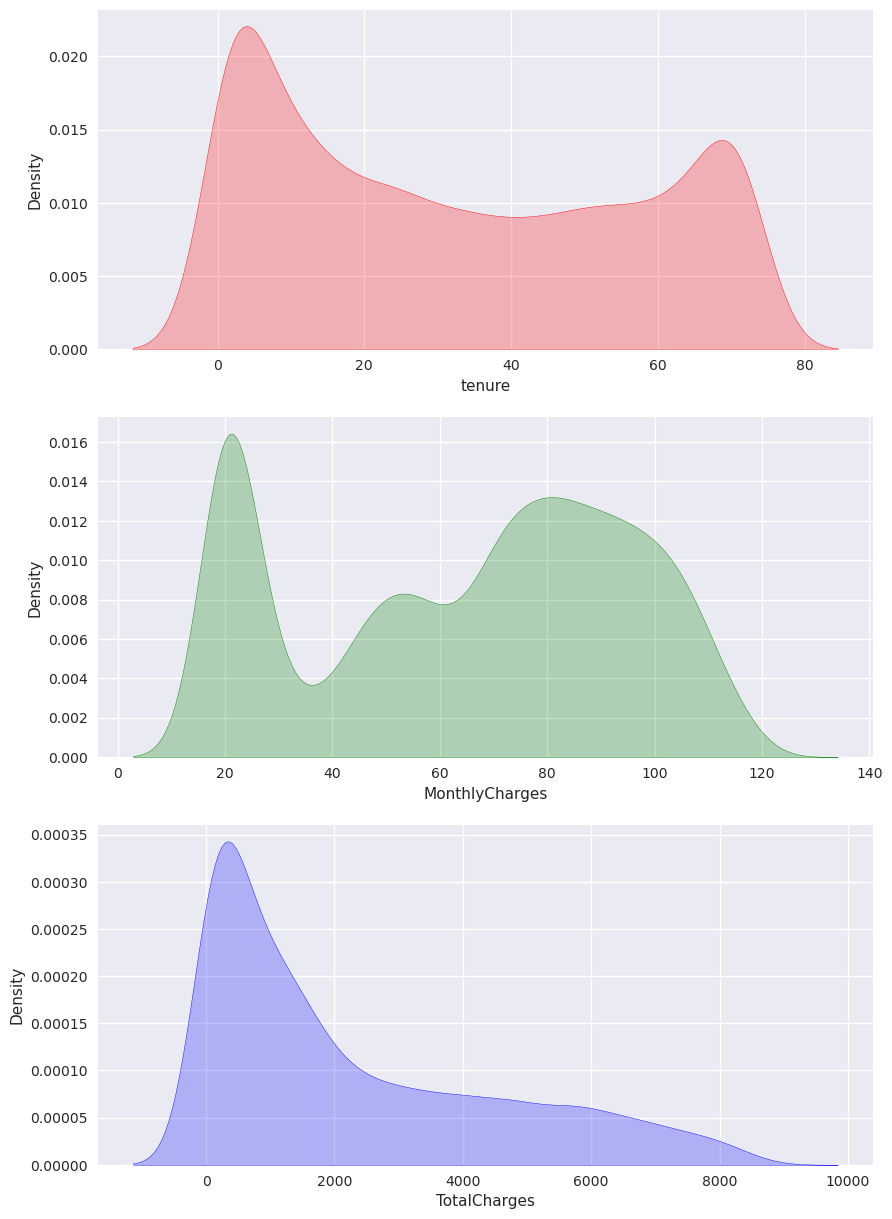

In [17]:
fig, ax = plt.subplots(3, figsize = (10, 15))
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
colors = ["red", "green", "blue"]
for i, (col, color) in enumerate(zip(num_cols, colors)):
    sns.kdeplot(data = df, x = col, ax = ax[i], fill = True, color = color)

> **Some nice insights:**
>- > **`tenure`**
>  >- It's a **bimodal** distribution.
>  >- This says that **most** of customers either stay for **short time** with the company or stays for **a long period**.
>- > **`MonthlyCharges`**
>  >- This is also a **bimodal** distribution.
>- > **`TotalCharges`**
>  >- The distribution is **right skewed**.
>  >- It has a very **different scale** that the other two columns.

#### **Ladies and gentlemen**, the moment you have been waiting for since ever.<br>
Let's make our **`test set`.**<br>
We will do it before **Exploring** to prevent **`Data Leakage`.**

In [18]:
train, test= train_test_split(df, test_size = 0.2, random_state = 42)

<center><h1>Data Exploration

<h2>Helpful Functions

In [19]:
def count(data, col, hue = None, ax = None):
    """
    This function draws a categorical column in count plot and pie plot.
    
    arguments \
    data: dataframe.
    col: col to visualize.
    hue: if you want to add a second variable.
    """
    # draw the count plot
    count =sns.countplot(data = data, x  = col, hue = hue ,palette = "pastel", ax = ax)
    
    # annotating
    for p in count.patches:
        count.annotate("({:.0f})".format(p.get_height()), (p.get_x() + 0.3, p.get_height() + 1), 
                       ha = "center", va = "bottom", color = "black", fontname = "monospace", fontsize = 10, weight = "bold")
    
    # labels
    labels = data[col].value_counts().sort_index().index
    count.set_xlabel(f"Categories", weight = "semibold", fontname = "monospace", fontsize = 10)
    count.set_ylabel("Count", weight = "semibold", fontname = "monospace", fontsize = 10)
    count.set_xticklabels(labels, fontsize = 10, weight = "bold")
    count.set_title(f"{col} count plot", weight = "bold", fontname = "monospace", fontsize = 15)


In [20]:
def plot_hist(df, col, hue = None, ax = None):
    """
     This function Outputs the histogram for the column"
     
     Arguments \
     df: dataframe.
     col: the column to plot the histogram for.
     hue: (optional) to specify if there is a second variable.
     ax: (optional) to specify the axis to draw in.
    """
    plot = sns.histplot(data = df, x = col, kde= True, hue = hue, palette = "pastel", ax = ax)
        
    # titles
    plot.set_title(f"histogram plot for column {col}", fontsize = 25,weight = "bold", 
                fontname = "monospace", pad = 20)
    plot.set_xlabel(col, fontsize = 15,  weight = "semibold", fontname = "monospace")
    plot.set_ylabel("Count", fontsize = 15,  weight = "semibold", fontname = "monospace")

<h2> Churn Column (target)

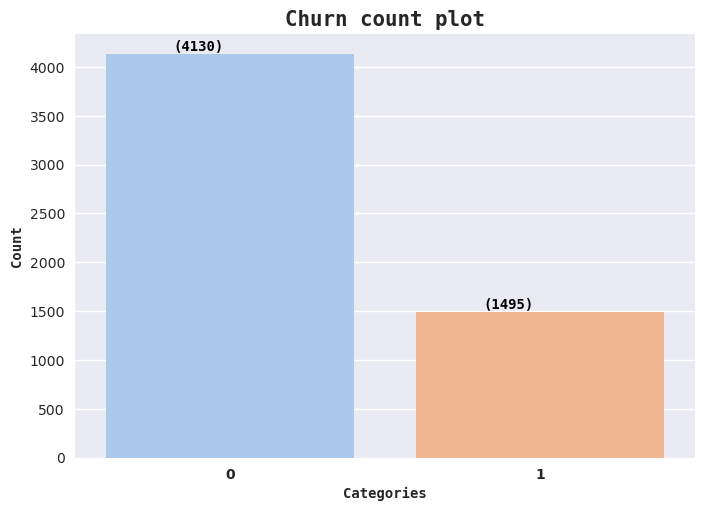

In [21]:
count(train, "Churn")
plt.show()

> **Insights:**
> - Many people tend **`not to churn`**.
> - Our data is **`imbalanced`**.

<h2> Categorical Features

> I will **divide** my categorical columns into **`3 parts`**.
> - **`Services`** that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
> - **`Customer account information`** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
> - **`Demographic info about customers`** – gender, age range, and if they have partners and dependents.

In [22]:
demographic = ["gender", "SeniorCitizen", "Partner", "Dependents"]
services = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity",
            "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
            "StreamingMovies"]
account_info = ["Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges", "tenure"]

<h3>Demographic

I will start by looking at each column separatly and investigate it with a **`count plot`**.

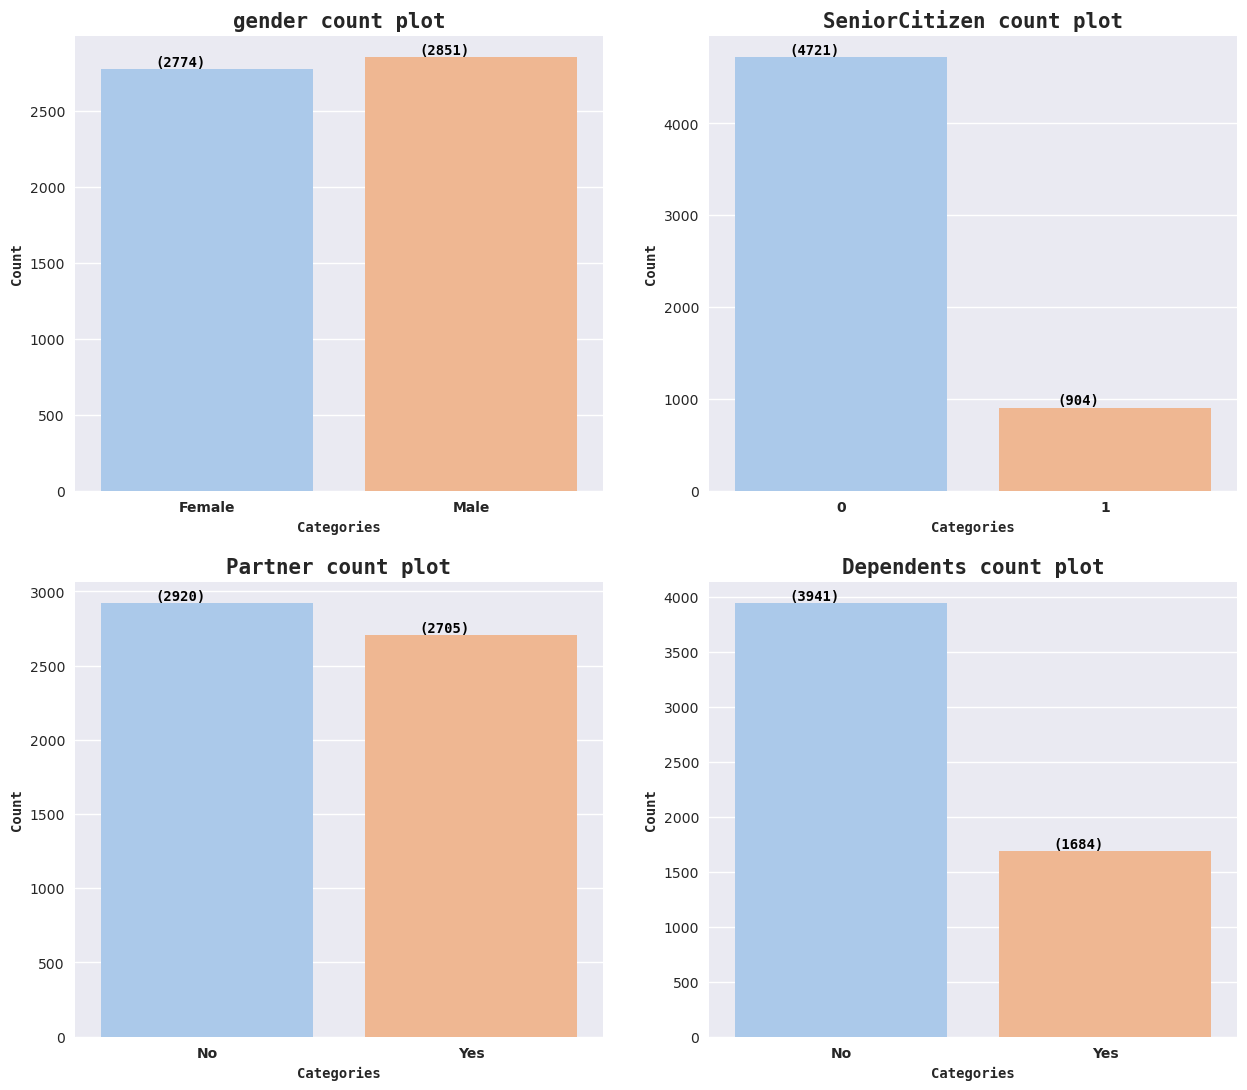

In [23]:
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
for i, col in enumerate(demographic):
    count(train, col, ax = ax[i // 2, i % 2])
plt.show()

> **Insights**:
>- > **`gender`**
>  > - Number of **`males`** is **very close** to number of **`females`**.
>- > **`SeniorCitizen`**
>  > - The **`majority`** of people **aren't** senior citizen.
>- > **`Partner`**
>  > - There is a **`small difference`** between the count of people who **have partner** and who **haven't**.
>- > **`Dependents`**
>  > - **`Majority`** of people have **no dependents**.

Now, Let's see how much each of them affects **`Churn`**.

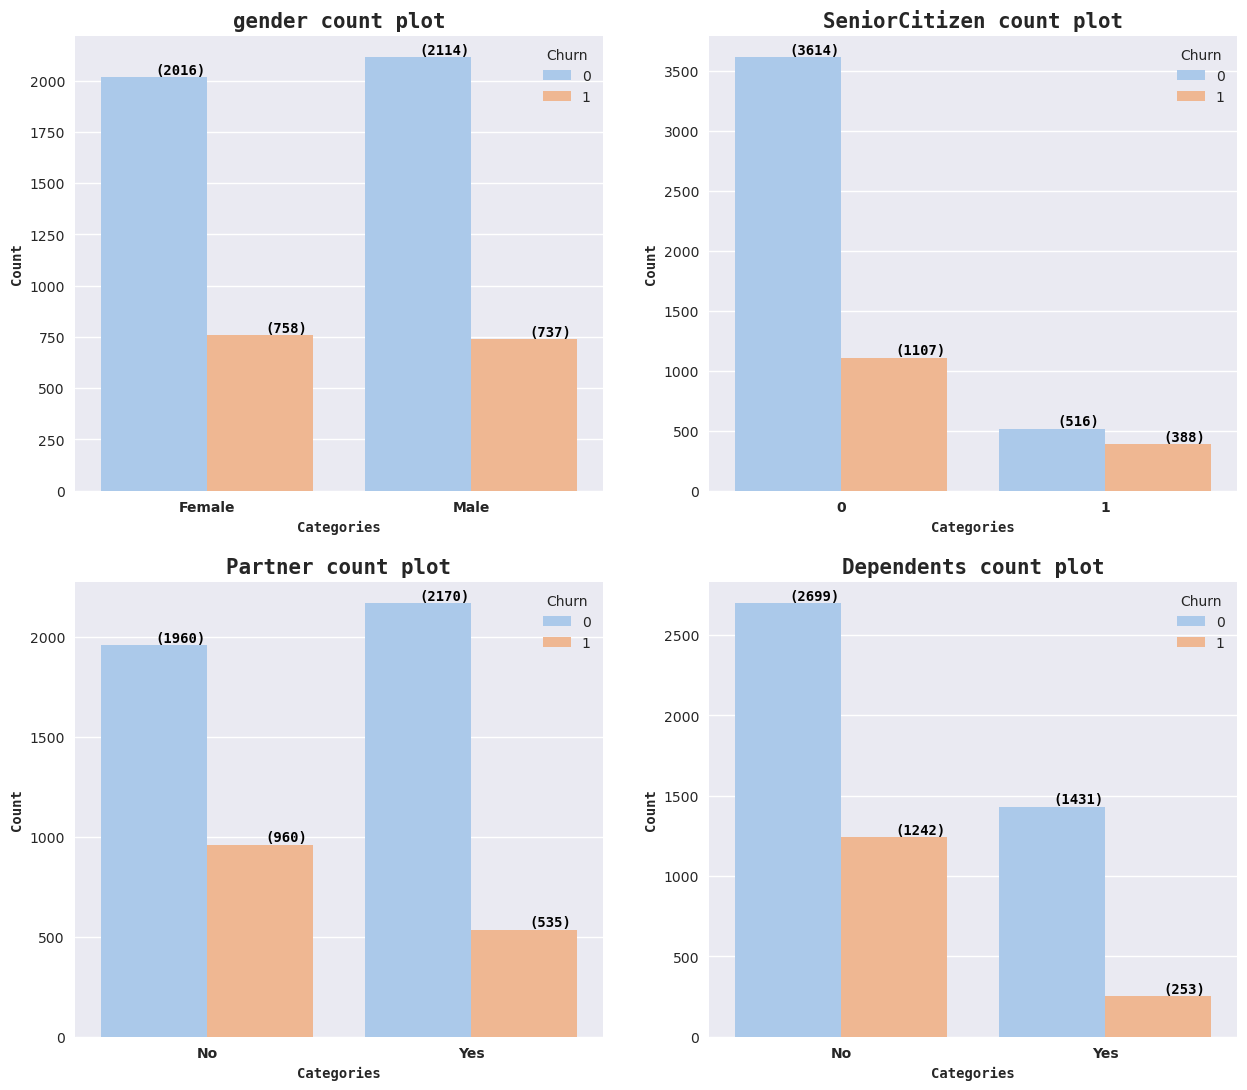

In [24]:
fig, ax = plt.subplots(2, 2, figsize = (15, 13))
for i, col in enumerate(demographic):
    count(train, col, ax = ax[i // 2, i % 2], hue = "Churn")
plt.show()

> **Who tends to churn ?**
> - **`Seniorcitizen`** tends to **churn**.
> - People who have no **`Partners`**.
> - People who have no **`Dependents`**.

> **What about `gender` ?**<br>
> - Well it looks like **`gender`** column has to **correlation** with **`churn`**.

<h3>Services

Time for columns about **`services`** that the company offers.<br>
Again, Let's explore them separatly first.

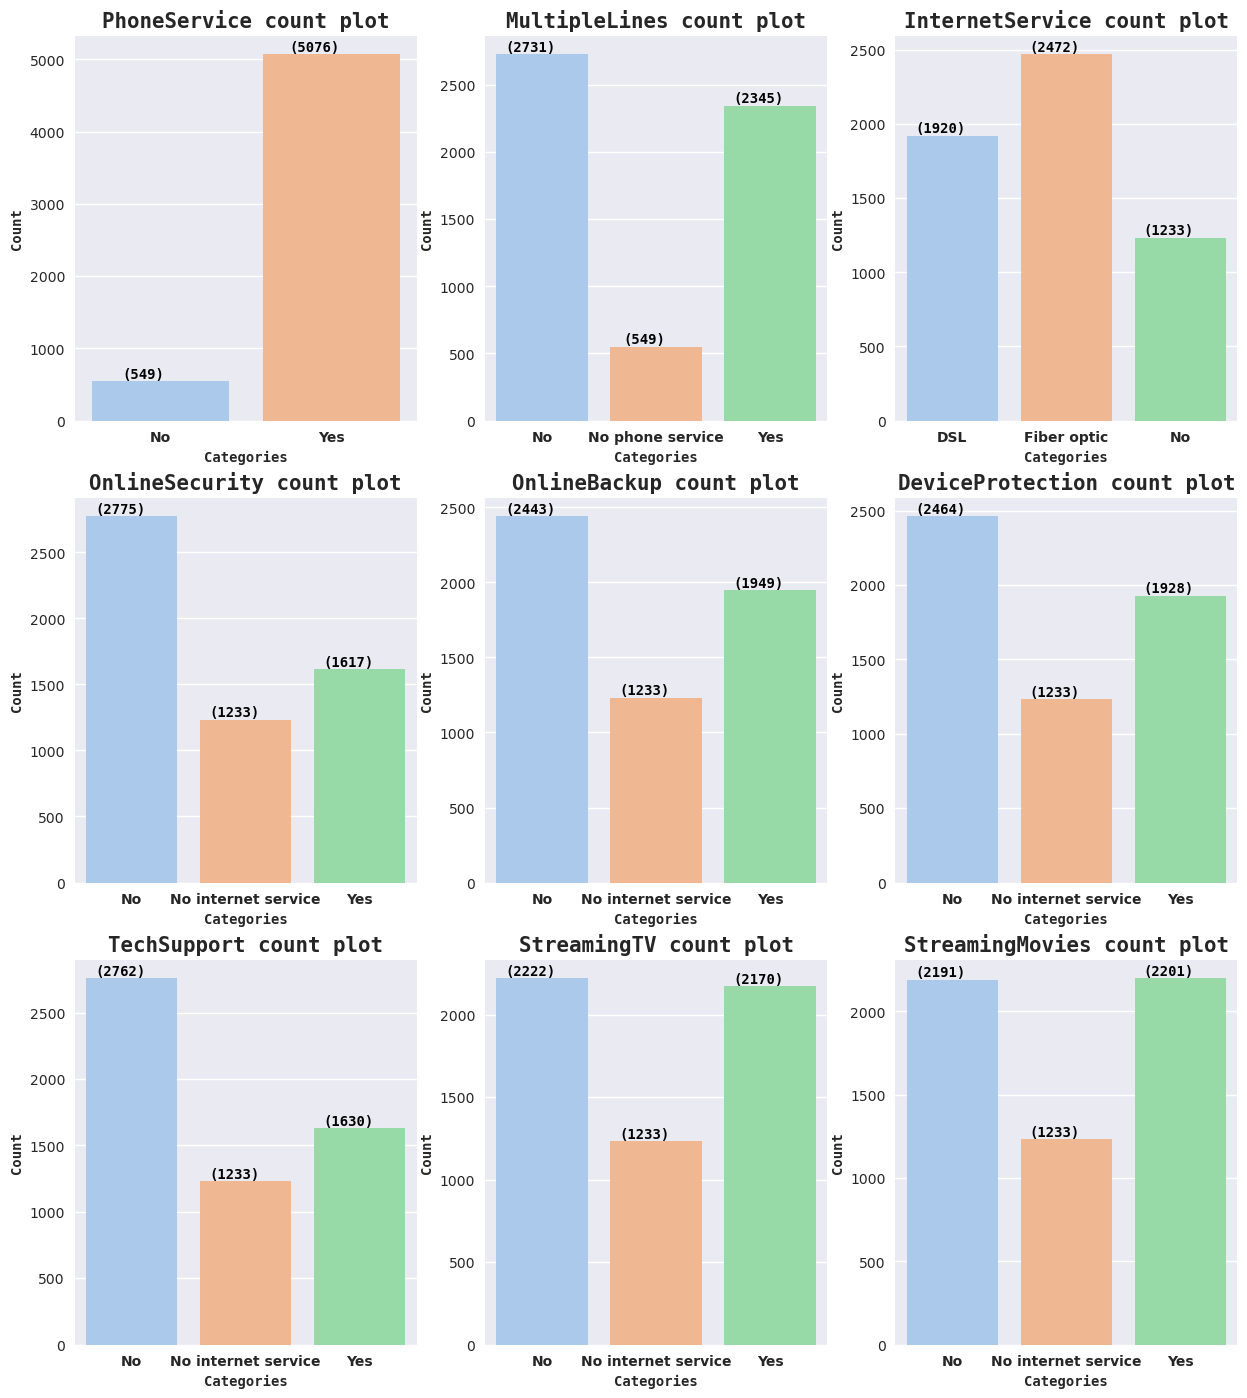

In [25]:
fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(services):
    count(train, col, ax = ax[i // 3, i % 3])
plt.show()

> **Insights:**
>- >**`PhoneService`**
>  >- As expected, **`Majority`** of people have **phone lines**.
>- >**`MultipleLines`**
>  >- To be honest, I didn't see that coming. I thought that a large percentage of people would have only one phone line, but it seems that there is a **`very small gap`** between people who have and haven't **multiple lines**.
>- >**`InternetService`**
>  >- **Most** of people use **`Fiber optics categories`**, but the gap isn't that big.
>  >- There are **`1214`** people that don't have **internet service**. I think this suggests that the company is much famous for phoneline services.
>- >**`OnlineSecurity`** & **`OnlineProtection`** & **`OnlineBackup`** & **`TechSupport`**
>  >- **`A big percentage`** of people **don't enjoy** those services.
>- >**`StreamingTV`** & **`StreamingMovies`**
>  >- Number of people who **have** this service is **`close`** to the number of people who **haven't**. I think most of our insights suggests that this company is **`famous for phone line service more the internet`**.


Now, Let's see how they affect **`Churn`**.

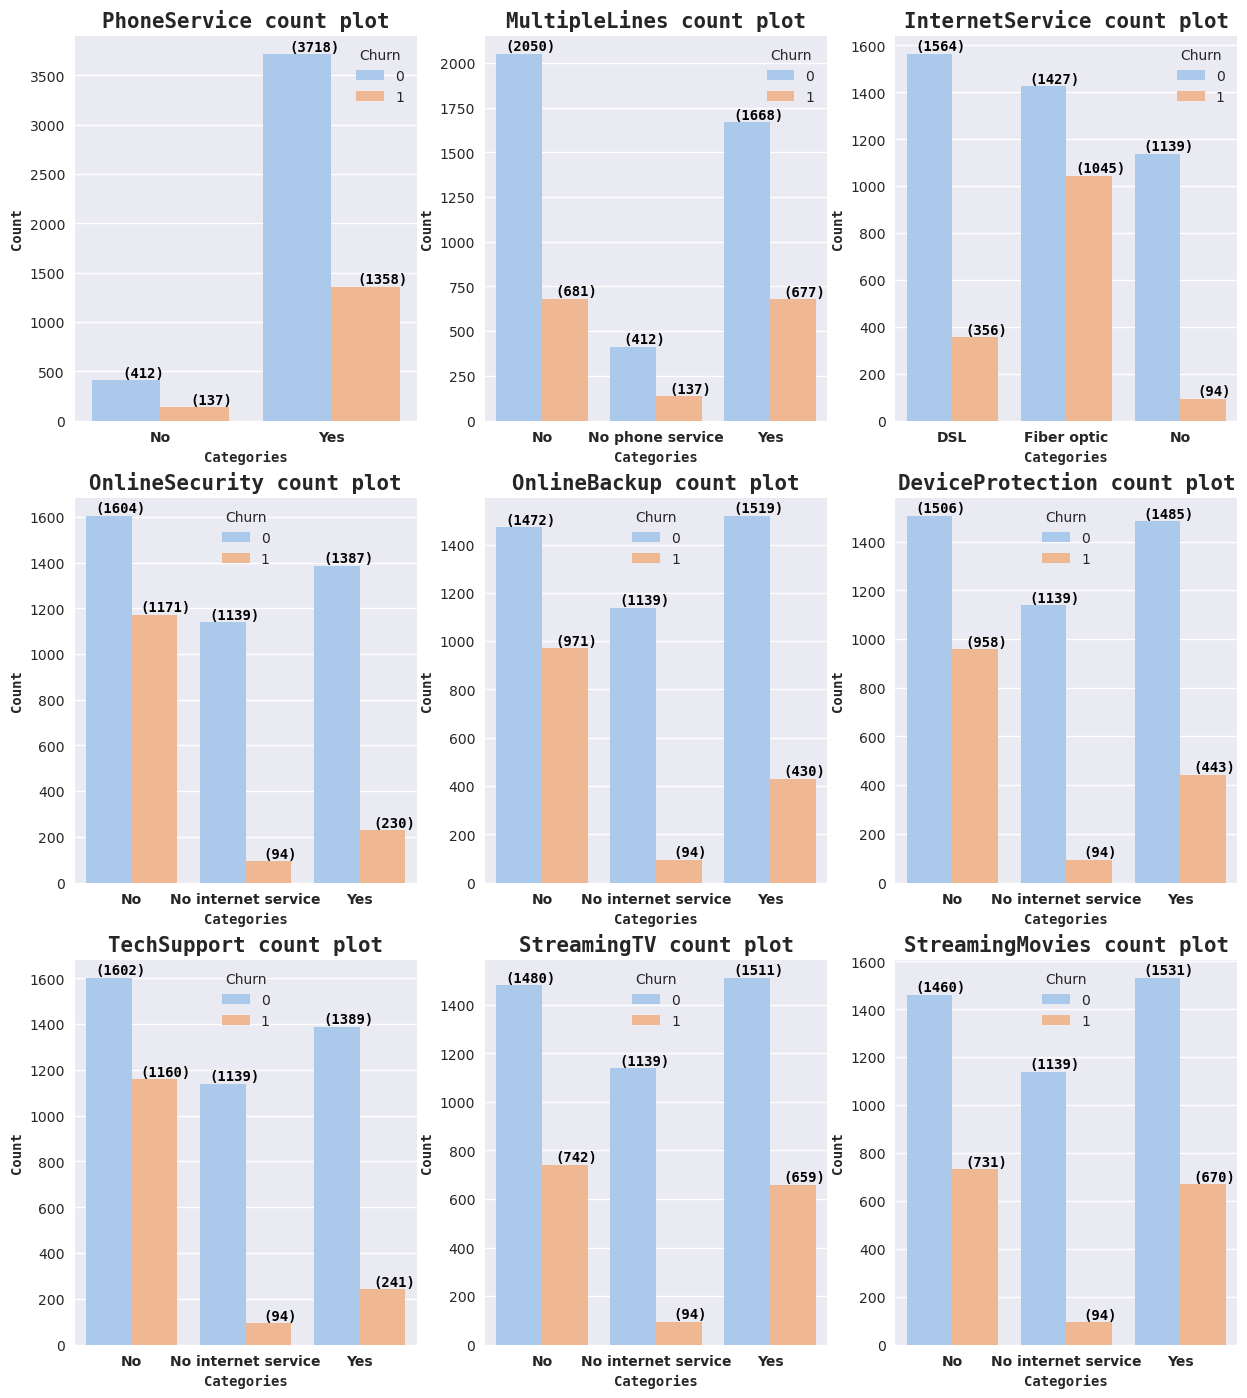

In [26]:
fig, ax = plt.subplots(3, 3, figsize = (15, 17))
for i, col in enumerate(services):
    count(train, col, ax = ax[i // 3, i % 3], hue = "Churn")
plt.show()

> **Insights:**
>- I think if a person **has** of **has't** **`phone service`**, It won't change much either if he **has** **`multiple lines`** or if he **hasn't**.
>- If a person doesn't have internet service, he is more likely **not to churn**.
>- Having **`online Backup`** & **`online security`** & **`Device protection`** & **`Tech support`** **increases** the probability that the person **won't churn**.
>- **`StreamingTv`** & **`Streaming Movies`** **don't have much effect** from my point of view.

<h3> account info

<h4> Contract

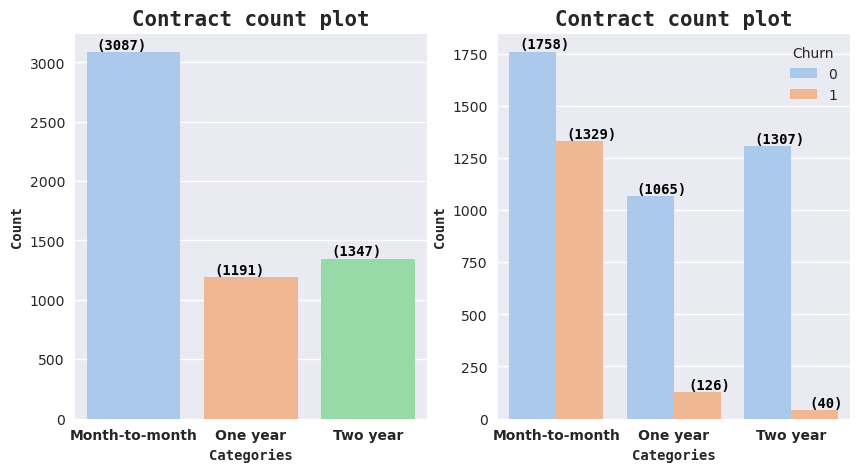

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
count(train, "Contract", ax = ax[0])
count(train, "Contract", ax = ax[1], hue = "Churn")

> **What do we see here ?**
>- A **large percentage** of people go with **`Month-to-month`** contracts.
>- People who have **`two year`** contract or **`one year`** are so expected to **stay with the company**. and I think this is a great insight. On the other hand, people have a **`Month-to-month`** contract are more likely to **churn**.

<h4> PaperlessBilling

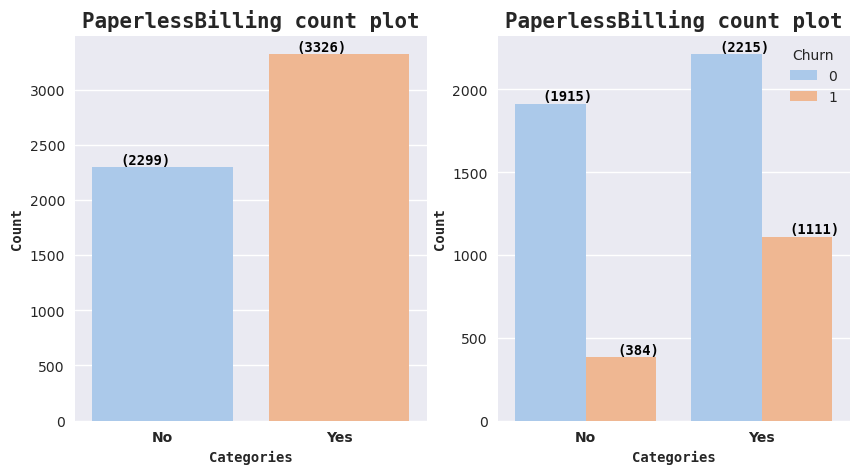

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
count(train, "PaperlessBilling", ax = ax[0])
count(train, "PaperlessBilling", ax = ax[1], hue = "Churn")

> **What do we see here ?**
>- Okay, **most** people have **`Paperless Billing`**.
>- There may be a small correlation between **having `peperless billing`** and **tending to `churn`**.

<h4>PaymentMethod

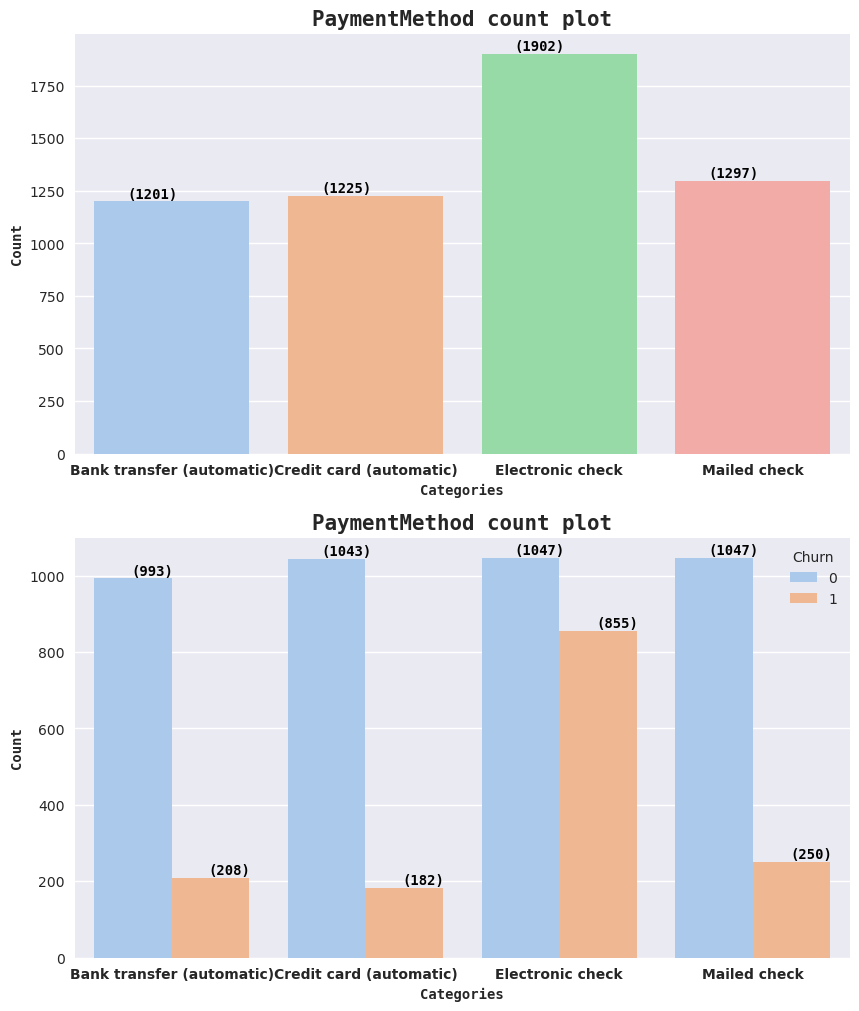

In [29]:
fig, ax = plt.subplots(2, 1, figsize = (10, 12))
count(train, "PaymentMethod", ax = ax[0])
count(train, "PaymentMethod", ax = ax[1], hue = "Churn")

> **What do we see here ?**
> - **Majority** of people have **`Electronic check`** as their **`payment method`**.
> - The **surprising** thing that having **`Electronic check`** as your **`payment method`** makes you **more likely to `churn`**. On the other hand, having any of the other methods like **`Band transfer`**, **`Credit card`** which are **automatice** and I think this may be a reason that people are **happy with them** or **`Malied check`** which isn't **automatic** but as we can see most people who has it **don't tend to churn**.

<h4>Numerical columns

Time for our numerical columns, We have previously seen their **distributions**.It's time to see thier **effect on churn** and search for **outliers**.

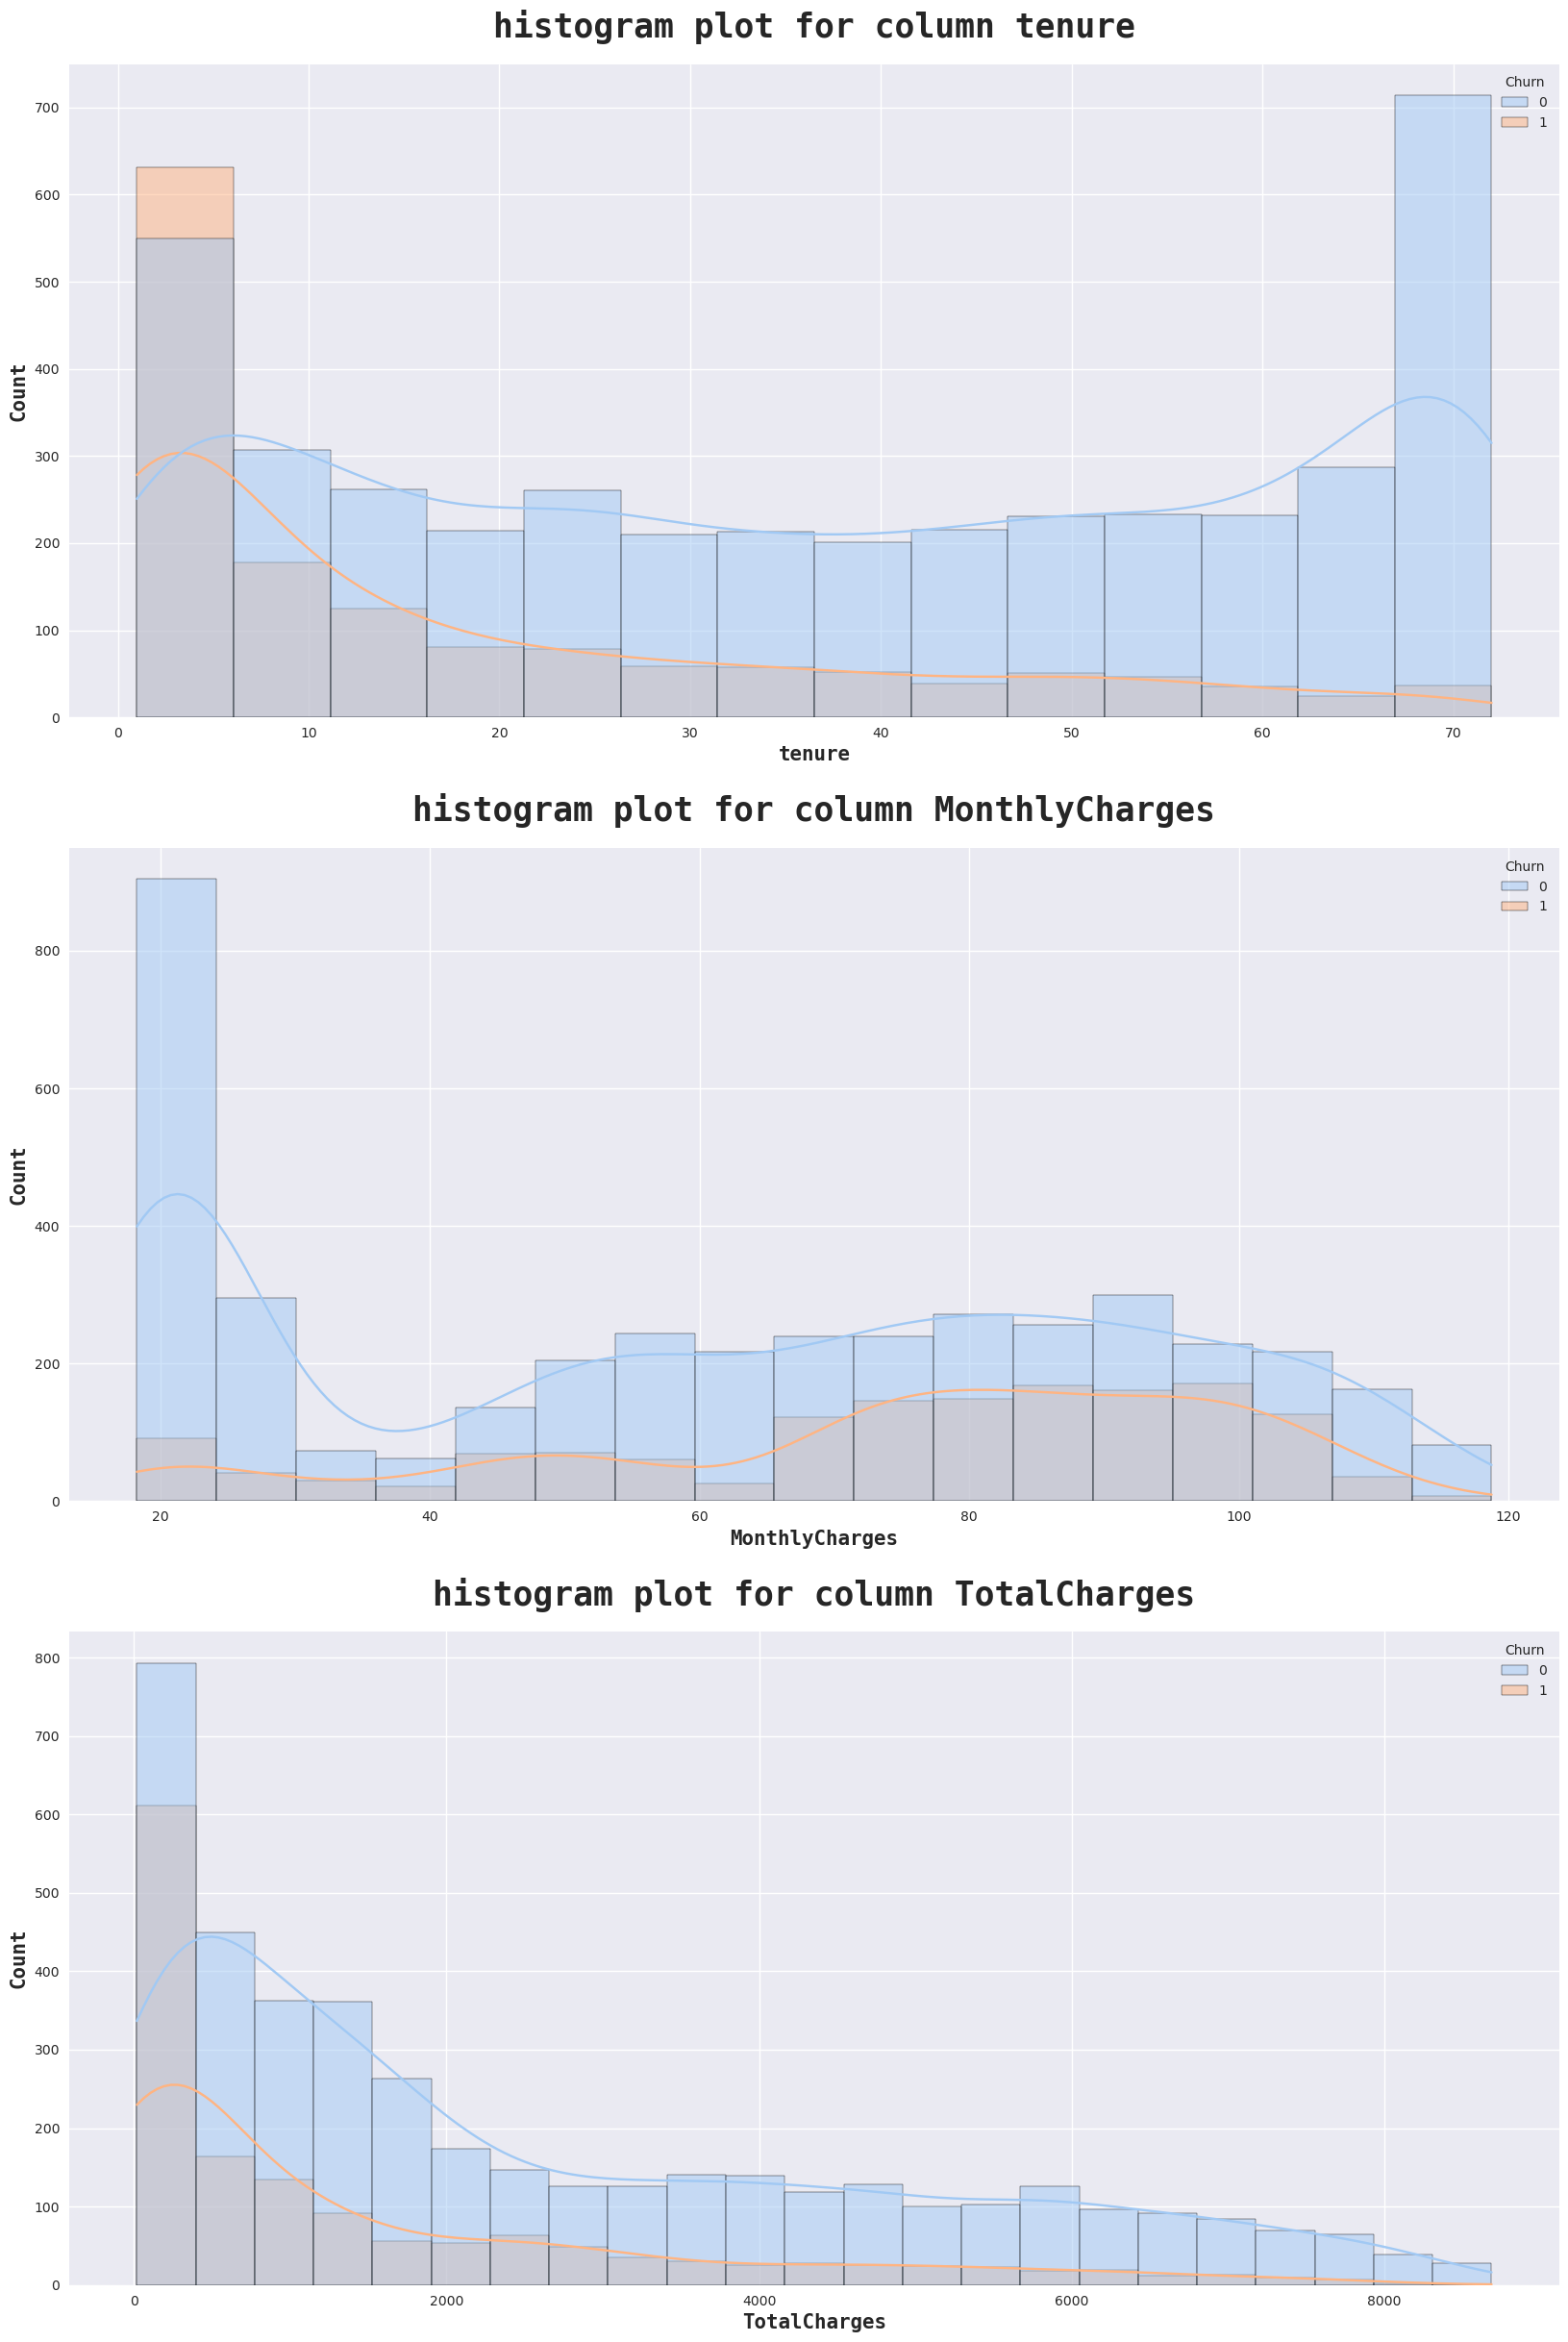

In [30]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
fig, ax = plt.subplots(3, 1, figsize = (20, 30))
for i, col in enumerate(num_cols):
    plot_hist(train, col, ax = ax[i], hue = "Churn")
plt.show()

> **What do we see here ?**
> - Well People who have spent **a long time** with the company **don't tend to churn** which I think is reasonable as they have been comfortable with the service. On the other hand, people **who churn** don't stay for many months with the company. They usually churn after only **5 months approximately**.
> - As the **`monthly charges` increases**, count of People who **`churn` gets bigger** and this is reasonable. Also, **most** of people who **don't churn** pay a **small amout of `Monthly charges`**.
> - Our data is **imbalanced** and people who **don't churn** are more than people who **do**, I think this is the reason why in the third plot the **two distributions** are **identical** except that the one with people **who chur**n is **shifted UP**.

Time to search for the most powerful enemy (at least for me) **`outliers`**.

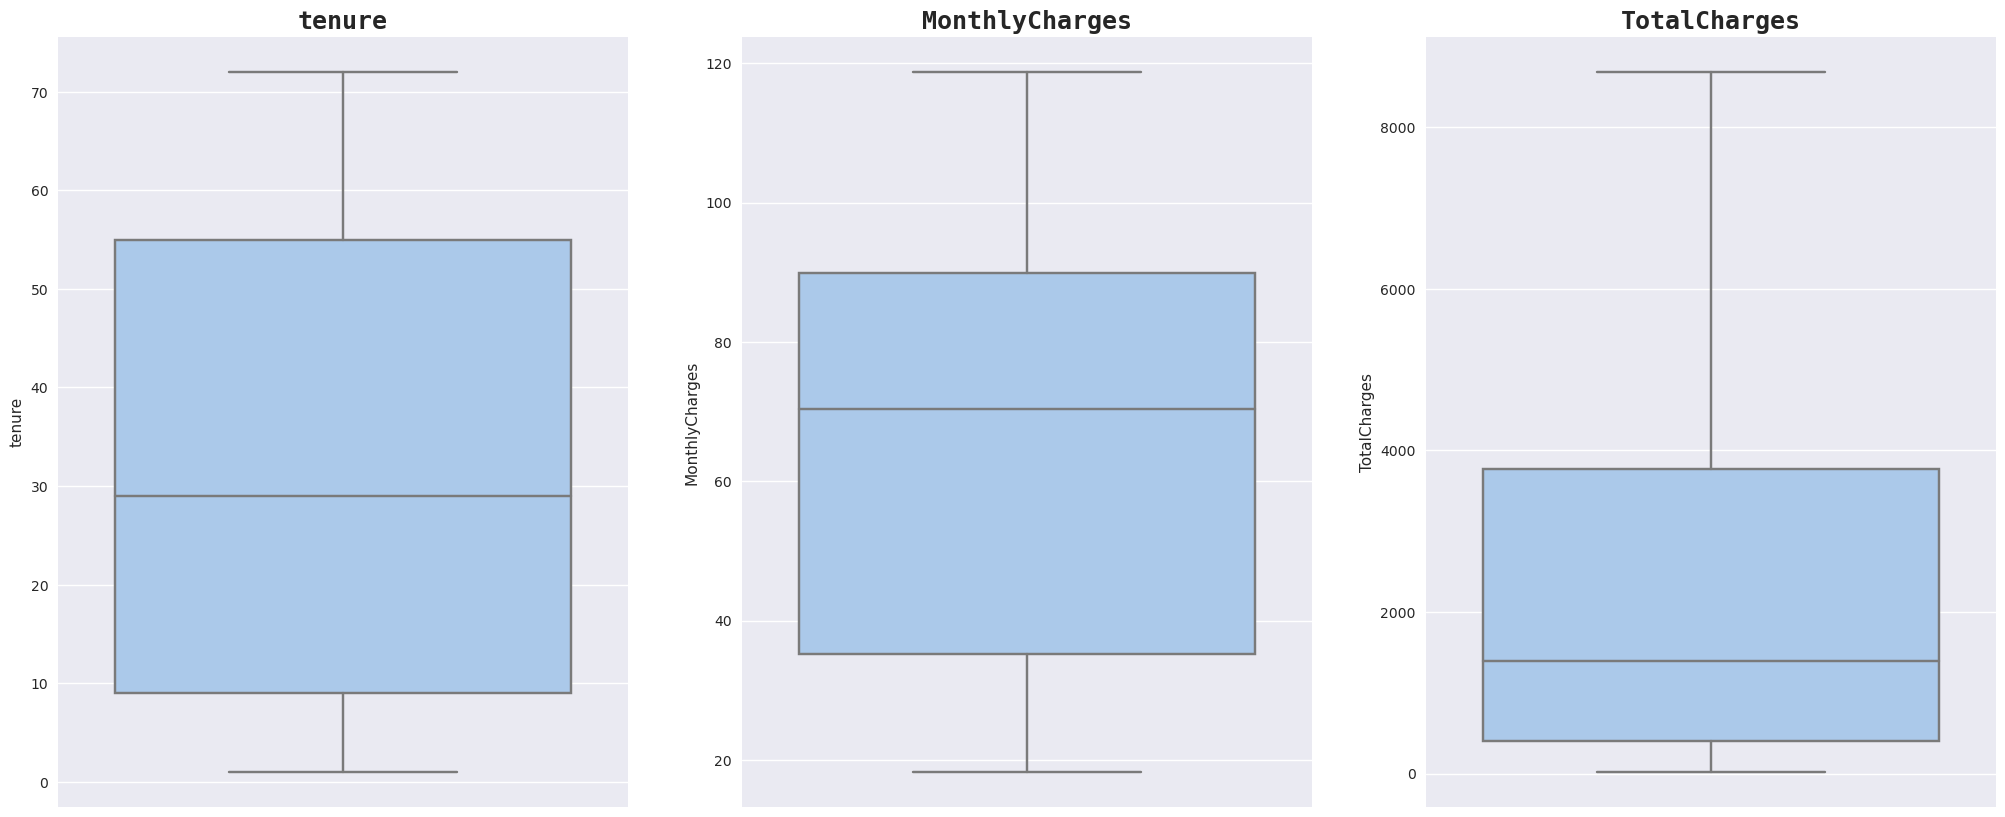

In [31]:
# I will draw boxplots to investigate outliers

fig, ax = plt.subplots(1, 3, figsize = (25, 10))

for i, col in enumerate(num_cols):
    g = sns.boxplot(data = train, y = col, ax = ax[i], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

Am I the happiest person ever? I think there is no outliers in the data.<br>
But of course problems of **skewness** in distributions still need to be fixed.

<center><h1>Cleaning and Feature engineering

> **Things to Fix:**
> - **Drop** **`CustomerID`** column.
> - **Skewness** in distribuitions.
> - **Encoding** categorical columns.

Before beginning, I will split my train set to **`features`** and **`target`**. I will do the same for my test set.

In [32]:
train_x = train.drop("Churn", axis = 1)
train_y = train["Churn"]
test_x = test.drop("Churn", axis = 1)
test_y = test["Churn"]

<h4> Skewness.

Let's print **`skewness`** of our columns.

In [33]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in (num_cols):
    print(f"{col} has skewness = {train_x[col].skew()}")

tenure has skewness = 0.24201466166359398
MonthlyCharges has skewness = -0.21790770281925442
TotalCharges has skewness = 0.9696819512661223


To make our model's life easier and to get reliable predictions, we need to transform our distributions, so that they become approximately normal.<br>
I am going to try **`box cox`** transformation and print the skewness after that.<br>
For **`tenure`** and **`MonthlyCharges`** I think the skewness is already good, but let's see if we can get any better.

In [34]:
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
for col in (num_cols):
    new = power_transform(train_x[[col]], method = "box-cox")
    print(f"After Box Cox {col} will have skewness  = {pd.Series(new.flatten()).skew()}")

After Box Cox tenure will have skewness  = -0.28259064857177446
After Box Cox MonthlyCharges will have skewness  = -0.2643135075102616
After Box Cox TotalCharges will have skewness  = -0.14405701301192633


I think no need to change **`tenure`** and **`MonthlyCharges`**.<br>
It has done a great effect with **`Total Charges`**<br>
I will visualize the distribution **after thr transformation** to see the result.

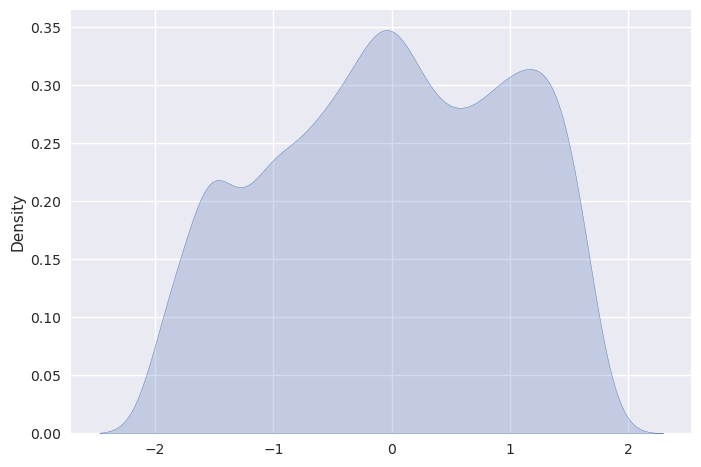

In [35]:
new_total = power_transform(train_x[["TotalCharges"]], method = "box-cox")
sns.kdeplot(x = new_total.flatten(), fill = True)
plt.show()

I think this is enough.<br>
Let's prepare the **transoformer** for it, So that we use later in our **pipeline**.

In [36]:
power = FunctionTransformer(power_transform, kw_args = dict(method = "box-cox"))

<h4> Encoding

I will use **`Ordinal encoding`** for my categorical features. I will add it to my final **`pipeline`**.

In [37]:
cat_columns = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
               "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
               "PaperlessBilling", "PaymentMethod"]

In [38]:
encoder = OneHotEncoder()

<h4> Imputing

I know that we have **dropped** **`null values`**, but in case we had null values during **`evaluation`**.<br>
So, I'll make imputer for **categorical** columns with the **`mode`** and for **numerical** columns with the **`median`**. 

In [39]:
cat_imputer = SimpleImputer(strategy = "most_frequent")
num_imputer = SimpleImputer(strategy = "median")

<h4> Categorical Pipeline

In [40]:
cat = Pipeline([
    ("cat_imputer", cat_imputer),
    ("end", encoder)
])

<h4> Numerical Pipelines

**`TotalCharges`** columns will have one more operation which is **`power transformation`**.<br>
So, I will do it in a special pipeline.

In [41]:
num = Pipeline([
    ("num_imputer", num_imputer),
    ("scaler", StandardScaler()),
])
total = Pipeline([
    ("num_imputer", num_imputer),
    ("power_transformer", power),
    ("scaler", StandardScaler())
])

<h4> Full Pipeline

In [42]:
cleaning = ColumnTransformer([
    ("num", num, ["tenure", "MonthlyCharges"]),
    ("total", total, ["TotalCharges"]),
    ("cat", cat, cat_columns),
    ("drop", "drop", ["customerID"])
], remainder = "passthrough")
train_x_prepared = cleaning.fit_transform(train_x)

<center><h1>Modeling

<h2> Baseline

I think since our data is **imbalanced**, the most suitable baseline will be to have a model that blindly predicts the **majority class**. <br>
I will use sklearn **DummyClassifier** for this purpose.

In [43]:
base = DummyClassifier(strategy = "constant", constant = 0)
base.fit(train_x_prepared, train_y)
y_pred_base = base.predict(test_x)

print(f"Your baseline model achieves accuracy = {accuracy_score(test_y, y_pred_base)}")
print(f"Your baseline model achieves f1 = {f1_score(test_y, y_pred_base)}")
print(f"Your baseline model achieves roc_auc = {roc_auc_score(test_y, y_pred_base)}")

Your baseline model achieves accuracy = 0.7341862117981521
Your baseline model achieves f1 = 0.0
Your baseline model achieves roc_auc = 0.5


We can notice that our baseline is completely **`random`** and it achieves **accuracy 73.41%**.<br>
Our model must be above that to be a good predictor.

<h2> Choose our model

We still have the problem that our data is **`imbalanced`**..

> **Techniques that we will try :**
> - **`Oversampling`**.
> - Use **`Boosting`** models that are suited for **imbalanced data**.

<h3> Oversampling

I will use **`SMOTE`** technique for oversampling.

While evaluating my models, I will use **`StratifiedkFold`**, so I can't oversample the whole training set, then use cross validation because this will cause my model to **overfit** artficially generated data.<br><br>
**What is the solution ?**<br>
I will make a pipeline that consists of oversampling as its first stage then our classifier and this pipeline will be passes to crossvalidation and that will ensure oversampling will be only applied to the data used for training in every CV.

In [44]:
# helpful class to automate a lot of work that we are going to do.
class SamplingClassifier:
    def __init__(self, sampler, model, x, y):
        self.x = x
        self.y = y
        self.sampler = sampler
        self.model = model
        self.pipeline = Pipeline([
            ("sampler", sampler),
            ("model", model)
        ])
    def k_fold(self, scores = ["accuracy", "roc_auc","f1"], n_splits = 5, n_jobs = -1):
        stats = []
        for scoring in scores:
            cv  = StratifiedKFold(n_splits = n_splits)
            scores = cross_val_score(self.pipeline, self.x, self.y, scoring = scoring, n_jobs = n_jobs)
            stats.append(scores.mean())
        return stats
    def plot_roc_curve(self, label = None, method = "decision_function"):
        scores = cross_val_predict(self.pipeline, self.x, self.y, method = "decision_function", n_jobs = -1)
        fpr, tpr, _ = roc_curve(train_y, scores)
        plt.plot(fpr, tpr, linewidth = 2, label= label)
        plt.plot([0, 1], [0, 1], "k--")
        plt.xlabel("False Positive Rate", fontname = "monospace", fontsize = 15, weight = "semibold")
        plt.ylabel("True Positive Rate(Recall)", fontname = "monospace", fontsize = 15, weight = "semibold")
        plt.title("ROC Curve", fontname = "monospace", fontsize = 17, weight = "bold")
        plt.axis([0, 1, 0, 1])
        plt.show()

I will start **without** oversampling.

In [45]:
models = [
    LogisticRegression(random_state = 42),
    SGDClassifier(random_state = 42),
    SVC(random_state = 42),
    DecisionTreeClassifier(random_state = 42),
    KNeighborsClassifier(),
    RandomForestClassifier(random_state = 42),
    BaggingClassifier(random_state = 42),
   
]

models_scores_no = pd.DataFrame(columns = ["accuracy","roc_auc", "f1"])

for model in models:
    clf = SamplingClassifier("passthrough", model, train_x_prepared, train_y)
    acc, f1, roc = clf.k_fold()
    models_scores_no.loc[model.__class__.__name__] = [acc, f1, roc]
    print(f"{model.__class__.__name__} is Done.")

LogisticRegression is Done.
SGDClassifier is Done.
SVC is Done.
DecisionTreeClassifier is Done.
KNeighborsClassifier is Done.
RandomForestClassifier is Done.
BaggingClassifier is Done.


In [46]:
models_scores_no.sort_values(by = "roc_auc", ascending = False)

,accuracy,roc_auc,f1
LogisticRegression,0.809600,0.851615,0.599793
SGDClassifier,0.774756,0.830368,0.606384
RandomForestClassifier,0.791467,0.824548,0.556960
SVC,0.802667,0.808311,0.577344
BaggingClassifier,0.774756,0.794223,0.514015
KNeighborsClassifier,0.769956,0.785769,0.547509
DecisionTreeClassifier,0.733333,0.662043,0.501030


Let's try oversampling. I will try **`SMOTE`**.

In [47]:
models_scores_smot = pd.DataFrame(columns = ["accuracy","roc_auc", "f1"])

for model in models:
    clf = SamplingClassifier(SMOTE(random_state = 42), model, train_x_prepared, train_y)
    acc, f1, roc = clf.k_fold()
    models_scores_smot.loc[model.__class__.__name__] = [acc, f1, roc]
    print(f"{model.__class__.__name__} is Done.")

LogisticRegression is Done.
SGDClassifier is Done.
SVC is Done.
DecisionTreeClassifier is Done.
KNeighborsClassifier is Done.
RandomForestClassifier is Done.
BaggingClassifier is Done.


In [48]:
models_scores_smot.sort_values(by = "roc_auc", ascending = False)

,accuracy,roc_auc,f1
LogisticRegression,0.762311,0.850911,0.635184
SGDClassifier,0.740622,0.838969,0.614995
SVC,0.769244,0.833816,0.629007
RandomForestClassifier,0.784178,0.823253,0.578353
BaggingClassifier,0.769778,0.795361,0.552948
KNeighborsClassifier,0.706489,0.772169,0.570737
DecisionTreeClassifier,0.726756,0.672390,0.518112


Let's try **ensemble** models that **don't need manual oversampling** from **`imblearn`**. I will also try **Boosting** models.

In [49]:
nosampling_models = [
    BalancedBaggingClassifier(random_state = 42),
    BalancedRandomForestClassifier(random_state = 42),
    EasyEnsembleClassifier(random_state = 42),
    AdaBoostClassifier(random_state = 42),
    ExtraTreesClassifier(random_state = 42), 
    GradientBoostingClassifier(random_state = 42),
    XGBClassifier(random_state = 42)  
]
models_scores = pd.DataFrame(columns = ["accuracy","roc_auc", "f1"])

for model in nosampling_models:
    clf = SamplingClassifier("passthrough", model, train_x_prepared, train_y)
    acc, f1, roc = clf.k_fold()
    models_scores.loc[model.__class__.__name__] = [acc, f1, roc]
    print(f"{model.__class__.__name__} is Done.")

BalancedBaggingClassifier is Done.
BalancedRandomForestClassifier is Done.
EasyEnsembleClassifier is Done.
AdaBoostClassifier is Done.
ExtraTreesClassifier is Done.
GradientBoostingClassifier is Done.
XGBClassifier is Done.


In [50]:
models_scores.sort_values(by = "roc_auc", ascending = False)

,accuracy,roc_auc,f1
GradientBoostingClassifier,0.802489,0.848589,0.591797
EasyEnsembleClassifier,0.746844,0.847306,0.629281
AdaBoostClassifier,0.802844,0.846938,0.593972
BalancedRandomForestClassifier,0.753067,0.836856,0.627525
XGBClassifier,0.789156,0.824241,0.570797
BalancedBaggingClassifier,0.759111,0.807838,0.585839
ExtraTreesClassifier,0.775822,0.795289,0.529097


I think I will go with **`LogisticRegression`** with **`no oversampling`**

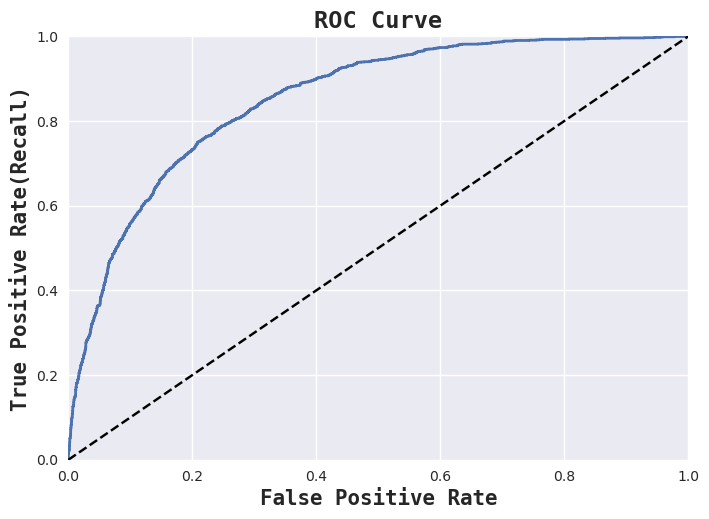

In [51]:
final_model = SamplingClassifier("passthrough", LogisticRegression(random_state = 42), train_x_prepared, train_y)
final_model.plot_roc_curve()

<h2> Fine-tune model

In [52]:
param_grid = {'C' : np.logspace(-4, 4, 20)}

final_model = LogisticRegression(random_state = 42)
grid_cv = GridSearchCV(final_model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1,
                       return_train_score = True)
grid_cv.fit(train_x_prepared, train_y)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             return_train_score=True, verbose=True)

In [53]:
best_estimator = grid_cv.best_estimator_
best_estimator

LogisticRegression(C=0.012742749857031334, random_state=42)

In [54]:
best_estimator.fit(train_x_prepared, train_y)
train_pred = best_estimator.predict(train_x_prepared)
train_scores = best_estimator.decision_function(train_x_prepared)

print(f"Accuracy on train set = {accuracy_score(train_y, train_pred):.3f}")
print(f"F1 on train set = {f1_score(train_y, train_pred):.3f}")
print(f"Auc on train set = {roc_auc_score(train_y, train_scores):.3f}")

print("-"*100)

test_x_prepared = cleaning.transform(test_x)
test_pred = best_estimator.predict(test_x_prepared)
test_scores = best_estimator.decision_function(test_x_prepared)
print(f"Accuracy on test set = {accuracy_score(test_y, test_pred):.3f}")
print(f"F1 on test set = {f1_score(test_y, test_pred):.3f}")
print(f"Auc on test set = {roc_auc_score(test_y, test_scores):.3f}")

Accuracy on train set = 0.812
F1 on train set = 0.600
Auc on train set = 0.853
----------------------------------------------------------------------------------------------------
Accuracy on test set = 0.795
F1 on test set = 0.553
Auc on test set = 0.835
